In [1]:
# === COURSE REPO SETUP === #

# 1. ENTER your GitHub username (the one that owns your fork)
github_username = "lanvu301"

# 2. Name of the repo (don't change unless your fork name is different)
repo_name = "STAT-7220-Applied-Experimental-Design"

# 3. Build the full repo URL for cloning
repo_url = f"https://github.com/{github_username}/{repo_name}.git"

import os

# --- Detect if we're already in a repo ---
cwd = os.getcwd()
if cwd.endswith(repo_name):
    print(f"✅ Already inside repo folder: {cwd}")
else:
    # --- If the repo folder exists, check if it's nested ---
    if os.path.exists(repo_name):
        print(f"⚠️ Found existing folder '{repo_name}'. Skipping clone to avoid nesting.")
    else:
        print(f"📥 Cloning repo from {repo_url}...")
        os.system(f"git clone {repo_url}")

    # --- Change to repo directory ---
    if os.path.exists(repo_name):
        os.chdir(repo_name)
        print(f"📂 Changed directory to: {os.getcwd()}")
    else:
        print("❌ ERROR: Repo folder not found. Please check your GitHub username.")

# --- Check if this is the instructor's repo instead of student's fork ---
# This command needs to be run from within the repository directory
remote_url = os.popen("git config --get remote.origin.url").read().strip()

if "abrown9008" in remote_url:
    print("⚠️ WARNING: You are working in the instructor's repo, not your fork!")
    print("💡 Please fork the repo to your own account and update `github_username` above.")
else:
    print(f"🔗 Connected to fork at: {remote_url}")

# Set Today's Directory #

today_dir = "Comparative Experiments"
os.chdir(today_dir)
print(f"📂 Changed directory to: {os.getcwd()}")

📥 Cloning repo from https://github.com/lanvu301/STAT-7220-Applied-Experimental-Design.git...
📂 Changed directory to: /content/STAT-7220-Applied-Experimental-Design
🔗 Connected to fork at: https://github.com/lanvu301/STAT-7220-Applied-Experimental-Design.git
📂 Changed directory to: /content/STAT-7220-Applied-Experimental-Design/Comparative Experiments


# Homework 1: Completely Randomized Designs
## Dr. Austin R. Brown
### School of Data Science & Analytics
### Kennesaw State University

**DUE: September 12, 2025**

**INSTRUCTIONS:** You are a quality control analyst for a craft brewery experimenting with a new India Pale Ale (IPA). One key quality attribute of IPA is its bitterness, measured in International Bitterness Units (IBUs). The brewery wants to determine if the aging time (3, 4, or 5 weeks) affects the IBUs of the beer. To test this, the brewing team brews a single batch of the experimental IPA and divides it into aging tanks, with each tank randomly assigned to be aged for 3, 4, or 5 weeks. After aging, the IBUs of ten randomly selected bottles from each aging time are measured using a spectrophotometer. The data are in the file `IPA.xlsx`. With these data, I want you to:

**Question 1.** Briefly define the objective of this experiment

Determine wheter the aging time contribute to the significant difference of the IBUs

**Question 2.** Specify the outcome variable

IBUs

**Question 3.** Specify the independent variable. What are some possible lurking variables?

Aging time

**Question 4.** Briefly explain why a completely randomized design is appropriate for this experiment.

**Question 5.** State the null and alternative hypotheses for this experiment.

$$ H_0: \mu_{\text{Week3}} = \mu_{\text{Week4}} = μ_{\text{Week5}} $$

$$ H_1: \mu_{\text{Week3}} \neq \mu_{\text{Week4}} \neq μ_{\text{Week5}}  $$

**Question 6.** Perform appropriate exploratory analysis, including summary statistics **and** data visualizations. Do the results of these analyses support the null or alternative hypothesis more strongly?


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weeks   30 non-null     object 
 1   IBU     30 non-null     float64
dtypes: float64(1), object(1)
memory usage: 612.0+ bytes
             IBU
count  30.000000
mean   59.204000
std    14.518316
min    39.040000
25%    46.515000
50%    58.655000
75%    65.795000
max    90.320000
Grand Mean: 59.204

Group Means:
     Weeks  mean_IBU
0  3 Weeks    45.657
1  4 Weeks    60.164
2  5 Weeks    71.791


<Axes: xlabel='Weeks', ylabel='IBU'>

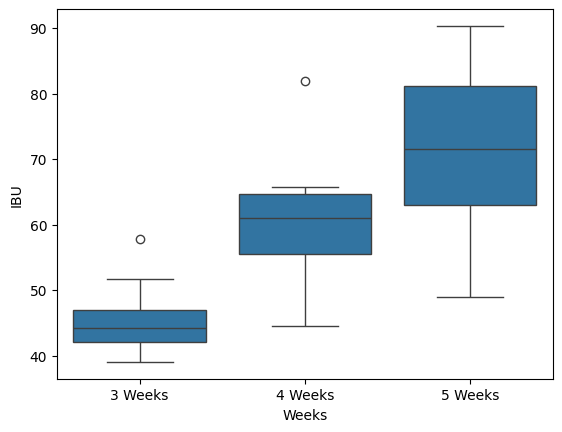

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
df=pd.read_excel("/content/STAT-7220-Applied-Experimental-Design/Assignments/HW1/IPA.xlsx")

#Summary Statistic
df.info()
summary=df.describe()
print(summary)

#Mean of IBU
mu_hat = df['IBU'].mean()
## Calculate the group means of IBU, grouped by Week ##

group_means = df.groupby('Weeks')['IBU'].mean().reset_index()
group_means = group_means.rename(columns={'IBU': 'mean_IBU'})


## Print Results ##

print("Grand Mean:", mu_hat)
print("\nGroup Means:")
print(group_means)


sns.boxplot(x='Weeks', y='IBU', data=df)



**Question 7.** Build a one-way ANOVA model. Test the assumption of normality using **both** a visual method and a testing method. Do the results of the normality test(s) support the assumption of normality?


            df      sum_sq      mean_sq          F    PR(>F)
Weeks      2.0  3428.75378  1714.376890  17.246546  0.000015
Residual  27.0  2683.90994    99.404072        NaN       NaN


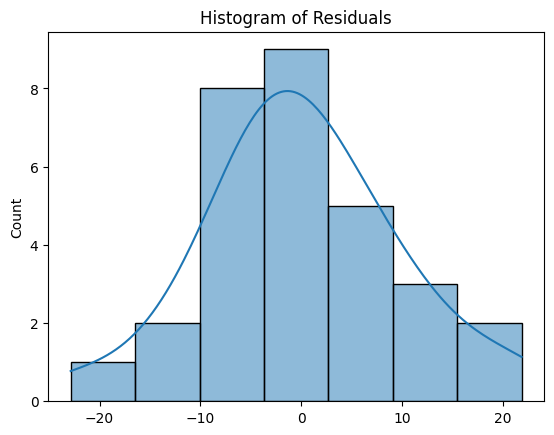

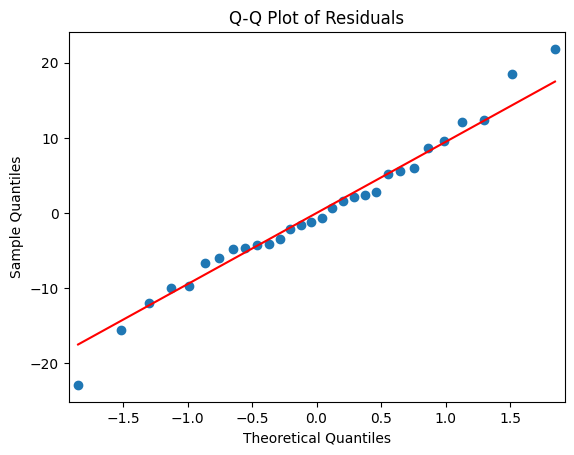

In [21]:
#%pip install statsmodels

## Import statsmodels ##

import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
## Fit One-Way ANOVA Model ##

mod = ols("IBU ~ Weeks", data=df).fit()

## Get the ANOVA table ##

aov_tab = sm.stats.anova_lm(mod,typ=1)

print(aov_tab)

#Visualization
    #Histogram

import scipy.stats as stats
residuals = mod.resid
sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals")
plt.show()

# Q-Q Plot
sm.qqplot(residuals, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()

The histogram and Q–Q plot indicate that the data follow an approximately normal distribution. While there is some deviation in the tails, these departures are not substantial. Furthermore, the ANOVA test yielded a highly significant p-value (p = 0.000015), providing additional evidence that the assumption of normality is reasonably satisfied for this dataset.

**Question 8.** Test the assumption of homogeneity of variance using **both** a visual method and a testing method. Do the results of the test(s) support the assumption of homogeneity of variance?

**Question 9.** Report the F-statistic and its associated p-value from the one-way ANOVA model. Which of our two hypotheses is more strongly supported? Why?

**Question 10.** If the data more strongly support the alternative hypothesis, perform Tukey's HSD post-hoc test to determine which aging times are significantly different from each other. If the data more strongly support the null hypothesis, explain why a post-hoc test would not be appropriate.

**Question 11.** Write a brief, contextual conclusion summarizing the results of your analyses.